current_camera_transformation : 
 [[-0.64278761 -0.76604444  0.          2.        ]
 [ 0.71984631 -0.60402277 -0.34202014  2.47705772]
 [ 0.26200263 -0.21984631  0.93969262  1.96575305]
 [ 0.          0.          0.          1.        ]]
object_position_camera [-1.58370855  0.73660145  5.58898986]


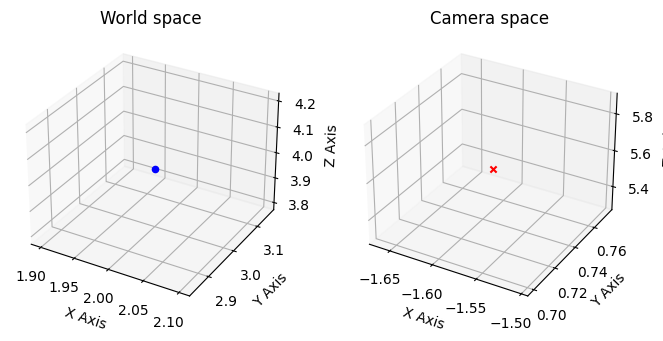

In [5]:
# Rohaan Advani - N19682109 - Solution HW1
import matplotlib.pyplot as plt
import numpy as np
import math

# In the beginning, the camera's local coordinate system coincides with the world coordinate system.
initial_camera_transformation = np.identity(4, dtype=np.float32)

# First rotate the camera around the z axis by 130 degrees, then move it by a translation of (dx, dy, dz) = (2.0, 3.0, 1.0), finally rotate it around the x axis by 20 degrees.
# TODO: compute the 4 x 4 matrix corresponding to each transformation described above and composite them into a single transformation matrix, i.e., the camera transformation matrix.
rotation1 = ([math.cos((13*math.pi)/18), -1*math.sin((13*math.pi)/18), 0, 0],[math.sin((13*math.pi)/18), math.cos((13*math.pi)/18), 0, 0],[0, 0, 1, 0],[0, 0, 0, 1])
translation = ([1, 0, 0, 2],[0, 1, 0, 3],[0, 0, 1, 1],[0, 0, 0, 1])
rotation2 = ([1, 0, 0, 0],[0, math.cos(math.pi/9), -1*math.sin(math.pi/9), 0],[0, math.sin(math.pi/9), math.cos(math.pi/9), 0],[0, 0, 0, 1])
current_camera_transformation = np.matmul(rotation2, np.matmul(translation, np.matmul(rotation1, initial_camera_transformation)))
print('current_camera_transformation : \n', current_camera_transformation)

# Object position in the world space.
object_position_world = np.array([2, 3, 4], dtype=np.float32)
object_position_world = np.append(object_position_world, 1)

# TODO: compute the object's position in the camera space using the camera transformation matrix.
object_position_camera = np.matmul(current_camera_transformation, object_position_world.transpose())

object_position_world = np.delete(object_position_world, 3)
# print(object_position_world.transpose())
object_position_camera = np.delete(object_position_camera, 3)
print('object_position_camera', object_position_camera)

# TODO: visualize the object's position in the world space and the camera space.
fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(121, projection='3d')
ax1.set_title("World space")
ax2 = fig.add_subplot(122, projection='3d')
ax2.set_title("Camera space")
ax1.scatter(*object_position_world, color='blue', marker='o')
ax2.scatter(*object_position_camera, color='red', marker='x')
ax1.set_xlabel("X Axis")
ax1.set_ylabel("Y Axis")
ax1.set_zlabel("Z Axis")
ax2.set_xlabel("X Axis")
ax2.set_ylabel("Y Axis")
ax2.set_zlabel("Z Axis")
plt.show()